In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import os
os.chdir("/gdrive/My Drive/IBM/Active_Hour_Pred")

In [ ]:
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [ ]:
data['date_time']=pd.to_datetime(data['date_time'],infer_datetime_format=True)

In [ ]:
len(data)

48204

In [ ]:
data=data.iloc[:,-2:]

In [ ]:
data=data.set_index('date_time')

In [ ]:
scaler=MinMaxScaler()
data['traffic_volume']=scaler.fit_transform(data['traffic_volume'].values.reshape(-1,1))

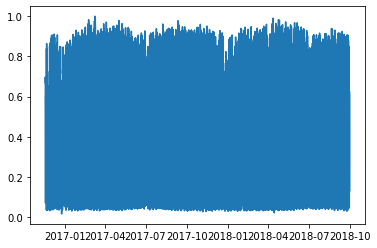

In [ ]:
plt.plot(data['traffic_volume'][-20000:])

In [ ]:
def create_dataset(dataset,look_back=1,look_forward=1):
    data_x=[]
    data_y=[]
    print(len(dataset)-look_back-look_forward+1)
    for i in range(len(dataset)-look_back-look_forward+1):
        data_x.append(dataset[i:i+look_back])
        data_y.append(dataset[i+look_back:i+look_back+look_forward])
    data_x=np.asarray(data_x,dtype='float32')
    data_y=np.asarray(data_y,dtype='float32')
    return data_x,data_y

In [ ]:
data['traffic_volume'].values[-20000:]

array([0.66923077, 0.66923077, 0.66923077, ..., 0.29656593, 0.19917582,
       0.13104396])

In [ ]:
x,y=create_dataset(data['traffic_volume'][-20000:].values,24,24)

19953


In [ ]:
x.shape

(19953, 24)

In [ ]:
x=np.reshape(x,(x.shape[0],x.shape[1],1))

In [ ]:
#y=np.reshape(y,(y.shape[0],y.shape[1],1))

In [ ]:
y.shape

(19953, 24)

In [ ]:
x.shape

(19953, 24, 1)

In [ ]:
%tensorflow_version 2.x

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import LSTM,Dropout,Dense,Input

In [ ]:
def create_model(look_back,look_forward):
    inp=Input(shape=(look_back,1))
    
    '''
    lstm1=LSTM(200,activation='relu',return_sequences=True)(inp)
    drop1=Dropout(0.25)(lstm1)
    #lstm1=LSTM(24,activation='relu',dropout=0.2,return_sequences=True)(inp)
    lstm2=LSTM(64,activation='relu',return_sequences=True)(drop1)
    drop=Dropout(0.25)(lstm2)
    lstm3=LSTM(look_forward,activation='relu')(drop)
    #dense=Dense(look_forward,activation='relu')(drop)
    '''
    lstm1=LSTM(200,activation='relu',return_sequences=False)(inp)
    drop=Dropout(0.2)(lstm1)
    dense1=Dense(200,activation='relu')(drop)
    dense2=Dense(64,activation='relu')(dense1)
    dense3=Dense(look_forward,activation='relu')(dense2)

    model=Model(inputs=inp,outputs=dense3)
    '''
    model=Sequential()
    #model.add(LSTM(16*look_forward,return_sequences=True,activation='relu',input_shape=(look_back,1)))
    #model.add(LSTM(2*look_forward,return_sequences=True))
    model.add(LSTM(400*look_forward,activation='relu'))
    #model.add(Dense(8*look_forward))
    #model.add(LSTM(look_forward))
    model.add(Dense(look_forward))
    '''

    model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
    return model

In [ ]:
model=create_model(24,24)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 24, 1)]           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_12 (Dense)             (None, 24)                1560      
Total params: 216,224
Trainable params: 216,224
Non-trainable params: 0
_____________________________________________________

In [ ]:
#model.fit(x,y,epochs=100,validation_split=0.01)
model.fit(x,y,epochs=50,batch_size=100)

Epoch 1/50
200/200 [==============================] - 18s 89ms/step - loss: 0.1259 - accuracy: 0.0782
Epoch 2/50
200/200 [==============================] - 17s 86ms/step - loss: 0.0874 - accuracy: 0.1058
Epoch 3/50
200/200 [==============================] - 18s 88ms/step - loss: 0.0814 - accuracy: 0.1315
Epoch 4/50
200/200 [==============================] - 17s 86ms/step - loss: 0.0796 - accuracy: 0.1490
Epoch 5/50
200/200 [==============================] - 18s 88ms/step - loss: 0.0770 - accuracy: 0.1545
Epoch 6/50
200/200 [==============================] - 17s 86ms/step - loss: 0.0684 - accuracy: 0.1590
Epoch 7/50
200/200 [==============================] - 17s 87ms/step - loss: 0.0675 - accuracy: 0.1677
Epoch 8/50
200/200 [==============================] - 17s 87ms/step - loss: 0.0669 - accuracy: 0.1704
Epoch 9/50
200/200 [==============================] - 17s 87ms/step - loss: 0.0662 - accuracy: 0.1780
Epoch 10/50
200/200 [==============================] - 17s 86ms/step - loss: 0.065

In [ ]:
y_pred=model.predict(x)

In [ ]:
sum(y_pred-y)/len(y_pred)

array([[-0.01030127, -0.00956527, -0.00793247]])

In [ ]:
y

array([[0.65480769],
       [0.69038462],
       [0.67554945],
       [0.71167582],
       [0.76703297],
       [0.82623626],
       [0.79546703],
       [0.65521978]])

In [ ]:
model.save("/gdrive/My Drive/IBM/Active_Hour_Pred/model24hrspredict.h5")

In [ ]:
from pickle import dump

In [ ]:
dump(scaler,open("/gdrive/My Drive/IBM/Active_Hour_Pred/scalernew.pkl","wb"))